<a href="https://colab.research.google.com/github/akshita1420/-Instagram-Reach-Analysis-Project/blob/main/Burnout_issues_among_Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Datasets**

In [32]:
pd.set_option('display.max_columns', None)
burnoutDf=pd.read_csv('/content/drive/MyDrive/dataset/burnoutPreData - employee_burnout_analysis-AI.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.9,0.52


In [17]:
#Convert into Datetime Datatype
burnoutDf["Date of Joining"]=pd.to_datetime(burnoutDf["Date of Joining"])

In [18]:
#give the number of rows and columns
burnoutDf.shape

(22750, 9)

In [20]:
#general information
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [21]:
#show top 5 rows
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [23]:
#extract all colums of the data
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [24]:
#check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [25]:
burnoutDf.duplicated().sum()

0

In [27]:
#calculate the mean,std,min.max and count of every attribute
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [28]:
#show the unique values
for i , col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n{burnoutDf[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-03-10T00:00:00.000000000' '2008-11-03T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-01-02T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-03-09T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-05-12T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [30]:
#drop irrelevent columns
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [39]:
#check the skewness of the attributes
intFloatburnoutDf = burnoutDf.select_dtypes([np.number])
for i , col in enumerate(intFloatburnoutDf.columns):
  if (intFloatburnoutDf[col].skew()>0.1):
    print("\n",col, "feature is Positively skewed and value is: ", intFloatburnoutDf[col].skew())
  elif (intFloatburnoutDf[col].skew() <= -0.1):
    print("\n",col, "feature is Negtively skewed and value is: ", intFloatburnoutDf[col].skew())
  else:
    print("\n",col, "feature is Normally Distributed and value is: ", intFloatburnoutDf[col].skew())




 Designation feature is Normally Distributed and value is:  0.09242138478903683

 Resource Allocation feature is Positively skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negtively skewed and value is:  -0.4308950578815428

 Burn Rate feature is Normally Distributed and value is:  0.045737370909640515


In [41]:
#Replace the null values with mean
burnoutDf[ 'Resource Allocation'].fillna(burnoutDf[ 'Resource Allocation'].mean(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].mean(), inplace=True)
burnoutDf[ 'Burn Rate'].fillna(burnoutDf[ 'Burn Rate'].mean(), inplace=True)

In [42]:
#check for null values
burnoutDf.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [43]:
#show the correlation
burnoutDf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


**Data Visualization**

In [48]:
# Plotting Heat map to check Correlation
Corr=burnoutDf.corr()
sns.set(rc={'figure.figsize': (14,12)})
fig = px.imshow(Corr, text_auto=True, aspect="auto")
fig.show()

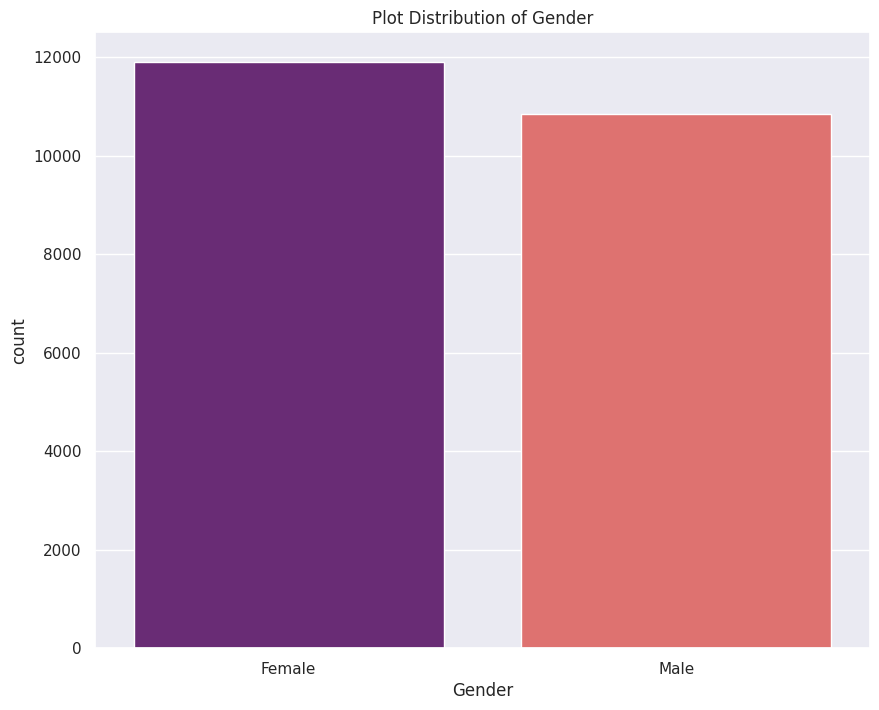

In [50]:
# Count plot distribution of "Gender"
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=burnoutDf, palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

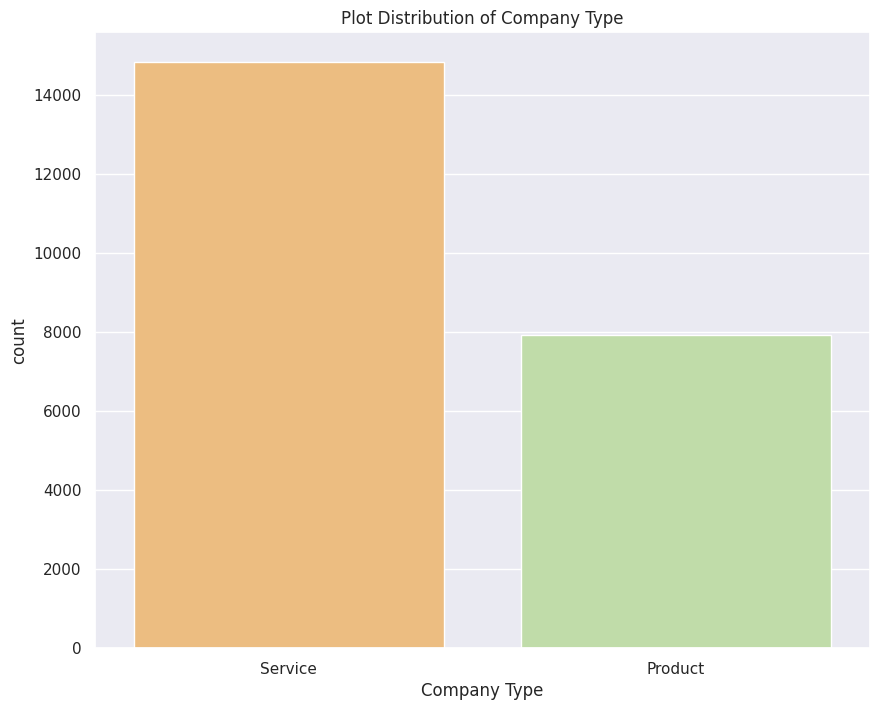

In [51]:
# Count plot distribution of "Company Type"
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type", data=burnoutDf, palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

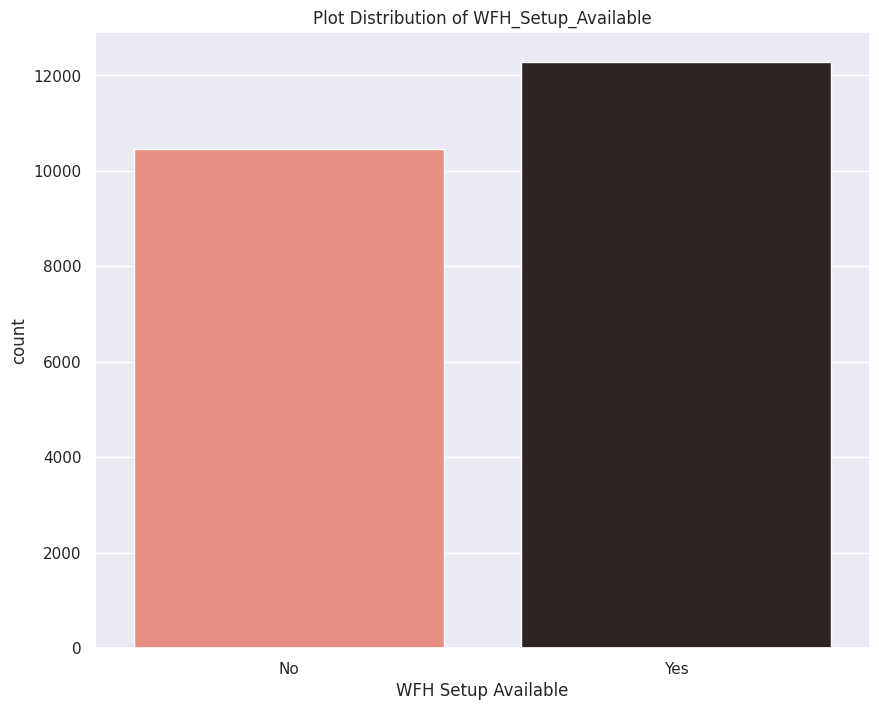

In [54]:
# Count plot distribution of "WFH Setup Available"
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available", data=burnoutDf, palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup_Available")
plt.show()

In [58]:
# Count-Plot Distribution of attributes with the help of Histogram
burn_st=burnoutDf.loc[:, 'Date of Joining': 'Burn Rate']
burn_st=burn_st.select_dtypes ([int, float])
for i, col in enumerate(burn_st.columns):
  fig = px.histogram (burn_st, x=col, title="Plot Distribution of "+col, color_discrete_sequence=['indianred'])
  fig.update_layout (bargap=0.2)
  fig.show()

In [61]:
[23] # Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDf, y="Burn Rate", color="Designation", title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout (bargap=0.1)
fig.show()

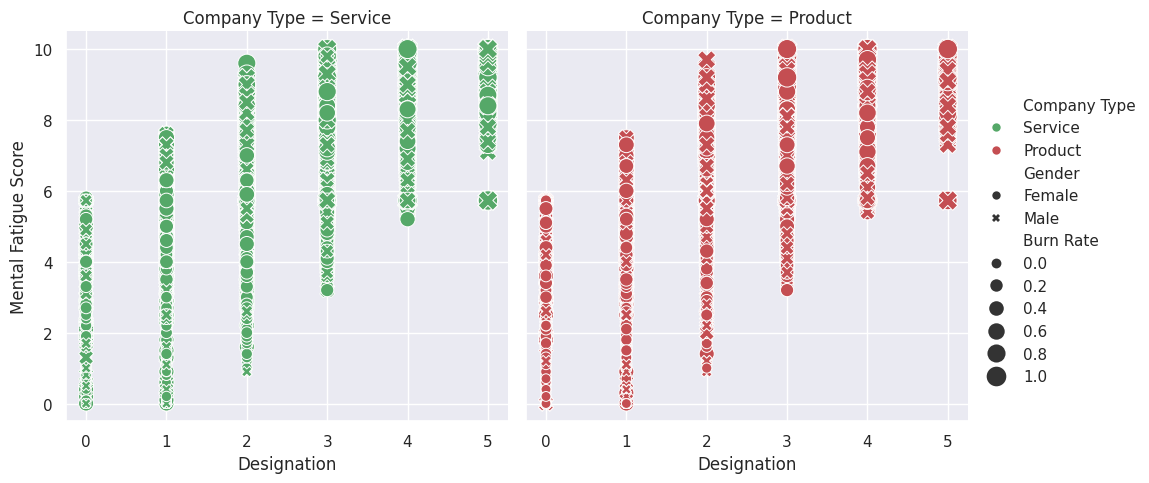

In [66]:
# Plot Distribution of "Designation vs mental fatigue" as per Company type, Burn rate and Gender
sns.relplot(
    data=burnoutDf, x="Designation", y="Mental Fatigue Score", col="Company Type",
    hue="Company Type", size="Burn Rate", style="Gender",
    palette=["g", "r"], sizes=(50, 200)
)

# **Label Encoding**

In [69]:
# label encoding and assign in new variable
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()

In [91]:
# Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf ['Company Type'].values)
burnoutDf['WFH_Setup_AvailableLabel'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [89]:
# check assigned values
gn=burnoutDf.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [93]:
# check assigned values
ct=burnoutDf.groupby('Company Type')
ct=ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [94]:
#check assigned values
wsa=burnoutDf.groupby('WFH Setup Available')
wsa = wsa['WFH_Setup_AvailableLabel']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64

In [95]:
#show last 10 rows
burnoutDf.tail(10)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company TypeLabel,WFH Setup AvailableLabel,WFH_Setup_AvailableLabel,Company_TypeLabel
22740,fffe33003300380031003100,9/5/2008,Female,Product,No,3,6.0,7.300000,0.550000,0,0,0,0,0
22741,fffe31003600350034003800,1/7/2008,Male,Product,No,2,5.0,6.000000,0.452005,1,0,0,0,0
22742,fffe33003200310039003000,7/28/2008,Male,Product,No,3,5.0,8.100000,0.690000,1,0,0,0,0
22743,fffe3300390030003600,12/15/2008,Female,Product,Yes,1,3.0,6.000000,0.480000,0,0,1,1,0
22744,fffe32003500370033003200,5/27/2008,Male,Product,No,3,7.0,6.200000,0.540000,1,0,0,0,0
22745,fffe31003500370039003100,12/30/2008,Female,Service,No,1,3.0,5.728188,0.410000,0,1,0,0,1
22746,fffe33003000350031003800,1/19/2008,Female,Product,Yes,3,6.0,6.700000,0.590000,0,0,1,1,0
22747,fffe390032003000,11/5/2008,Male,Service,Yes,3,7.0,5.728188,0.720000,1,1,1,1,1
22748,fffe33003300320036003900,1/10/2008,Female,Service,No,2,5.0,5.900000,0.520000,0,1,0,0,1
22749,fffe3400350031003800,1/6/2008,Male,Product,No,3,6.0,7.800000,0.610000,1,0,0,0,0


# **Feature Selection**

In [97]:
#Feature selection
Columns=['Designation', 'Resource Allocation', 'Mental Fatigue Score',
'GenderLabel', 'Company TypeLabel', 'WFH_Setup_AvailableLabel']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [98]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2             3.000000              3.800000            0   
1                1             2.000000              5.000000            1   
2                2             4.481398              5.800000            0   
3                1             1.000000              2.600000            1   
4                3             7.000000              6.900000            0   
...            ...                  ...                   ...          ...   
22745            1             3.000000              5.728188            0   
22746            3             6.000000              6.700000            0   
22747            3             7.000000              5.728188            1   
22748            2             5.000000              5.900000            0   
22749            3             6.000000              7.800000            1   

       Company TypeLabel  WFH_Setup_AvailableLabel  
0         

In [99]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# **Implemeting PCA**

In [105]:
# Principle component Analyssis
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca =pca.fit_transform(X)
print("PCA shape of x is: ",X_pca.shape, "and orignal shape is: ", X.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)

PCA shape of x is:  (22750, 4) and orignal shape is:  (22750, 6)
% of importance of selected features is: [0.78371089 0.11113597 0.03044541 0.02632422]
The number of features selected through PCA is: 4


# **Data Splitting**

In [110]:
# Data Splitting in train and test
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test=train_test_split(X_pca,y, test_size = 0.25, random_state=10)

In [111]:
#print the shape of splitted data
print(X_train_pca.shape, X_test.shape, Y_train.shape, Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


# **Model Implementation**
Random Forest Regression

In [112]:
from sklearn.metrics import r2_score

In [118]:
#Random Forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)
train_pred_rf=rf_model.predict(X_train_pca)
train_r2=r2_score(Y_train, train_pred_rf)
test_pred_rf=rf_model.predict(X_test)
test_r2=r2_score (Y_test, test_pred_rf)
# Accuracy score
print("Accuracy score of tarin data: "+str(round (100* train_r2, 4))+"%")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+"%")

Accuracy score of tarin data: 91.185%
Accuracy score of test data: 83.8982%


# **AdaBoost Regression**

In [125]:
#AdaBoost regressor
from sklearn.ensemble import AdaBoostRegressor
abr_model=AdaBoostRegressor()
abr_model.fit(X_train_pca, Y_train)
train_pred_adboost=abr_model.predict(X_train_pca)
train_r2=r2_score (Y_train, train_pred_adboost)
test_pred_adaboost=abr_model.predict(X_test)
test_r2 = r2_score (Y_test, test_pred_adaboost)
# Accuracy score
print("Accuracy score of tarin data: "+str(round (100* train_r2, 4))+"%")
print("Accuracy score of test data: "+str(round (100*test_r2, 4))+"%")

Accuracy score of tarin data: 77.091%
Accuracy score of test data: 76.5419%
